In [15]:
from collections import OrderedDict
import torch
from torch import nn
from torch import optim

from torchvision import datasets, transforms

import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

In [16]:
def view_classify(img, ps):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

In [6]:
# Define a transform to normalize the data (Preprocessing)
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5)) ])

# Download and load the training data
trainset    = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True)

# Download and load the test data
testset    = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True)

In [7]:
# Hyperparameters for our network
input_size   = 784
hidden_sizes = [128, 64]
output_size  = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
          ('fc1', nn.Linear(input_size, hidden_sizes[0])),
          ('relu1', nn.ReLU()),
          ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
          ('relu2', nn.ReLU()),
          ('logits', nn.Linear(hidden_sizes[1], output_size))]))

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [10]:
epochs = 3
print_every = 40

for e in range(epochs):
    running_loss = 0
    print(f"Epoch: {e+1}/{epochs}")

    for i, (images, labels) in enumerate(iter(trainloader)):

        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        output = model.forward(images)   # 1) Forward pass
        loss = criterion(output, labels) # 2) Compute loss
        loss.backward()                  # 3) Backward pass
        optimizer.step()                 # 4) Update model
        
        running_loss += loss.item()
        
        if i % print_every == 0:
            print(f"\tIteration: {i}\t Loss: {running_loss/print_every:.4f}")
            running_loss = 0

torch.save(model.state_dict(), "output/model.pt")

Epoch: 1/3
	Iteration: 0	 Loss: 0.0030
	Iteration: 40	 Loss: 0.2448
	Iteration: 80	 Loss: 0.2749
	Iteration: 120	 Loss: 0.2983
	Iteration: 160	 Loss: 0.2982
	Iteration: 200	 Loss: 0.2788
	Iteration: 240	 Loss: 0.2431
	Iteration: 280	 Loss: 0.2711
	Iteration: 320	 Loss: 0.2343
	Iteration: 360	 Loss: 0.2435
	Iteration: 400	 Loss: 0.3002
	Iteration: 440	 Loss: 0.2851
	Iteration: 480	 Loss: 0.2929
	Iteration: 520	 Loss: 0.3076
	Iteration: 560	 Loss: 0.3220
	Iteration: 600	 Loss: 0.2872
	Iteration: 640	 Loss: 0.2588
	Iteration: 680	 Loss: 0.3009
	Iteration: 720	 Loss: 0.3251
	Iteration: 760	 Loss: 0.2782
	Iteration: 800	 Loss: 0.2818
	Iteration: 840	 Loss: 0.2578
	Iteration: 880	 Loss: 0.2748
	Iteration: 920	 Loss: 0.2954
	Iteration: 960	 Loss: 0.2798
	Iteration: 1000	 Loss: 0.3321
	Iteration: 1040	 Loss: 0.2476
	Iteration: 1080	 Loss: 0.3181
	Iteration: 1120	 Loss: 0.2928
	Iteration: 1160	 Loss: 0.2534
	Iteration: 1200	 Loss: 0.3473
	Iteration: 1240	 Loss: 0.3523
	Iteration: 1280	 Loss: 0.

2


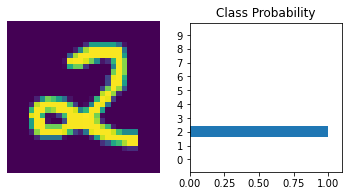

In [36]:
images, labels = next(iter(testloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)

view_classify(img.view(1, 28, 28), ps)

print(ps.argmax().item())

In [35]:
result = ps.data.numpy().squeeze()
result

array([2.7282691e-02, 2.1313112e-06, 2.3343969e-02, 3.3521052e-02,
       7.1679242e-05, 8.6236540e-03, 6.8794098e-04, 6.5312047e-06,
       9.0206951e-01, 4.3908213e-03], dtype=float32)

In [25]:
result.argmax()

3